## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
acc = pd.read_csv("ACC.csv")
adaniports = pd.read_csv("ADANIPORTS.csv")

Reshape

In [3]:
acc = acc["Close"]
adaniports = adaniports["Close"]

acc = acc[0:1200].values
adaniports = adaniports[0:1200].values

acc = acc.reshape(-1,25)
adaniports = adaniports.reshape(-1,25)

In [4]:
w1_array = list(np.arange(0,1.01,0.01))
w2_array = list(np.arange(0,1.01,0.01))
w2_array.reverse()
acc.shape

(48, 25)

In [5]:
def day_eval(fund,arr1,arr2,w1,w2):
    w1= w1/(w1+w2)
    w2= w2/(w1+w2)
    acc_fund = fund*w1
    adani_fund = fund*w2
    
    q1 = acc_fund//arr1[0]
    q2 = adani_fund//arr2[0]
    
    cash = fund - q1*arr1[0] - q2*arr2[0]
    vals = []
    for i, j in zip(arr1, arr2):
        vals.append(q1*i+q2*j+cash)
    
    return q1*arr1[-1]+q2*arr2[-1]+cash, (q1*arr1[-1]+q2*arr2[-1]+cash)-(fund), np.std(vals)

## Fixed Portfolio Weights

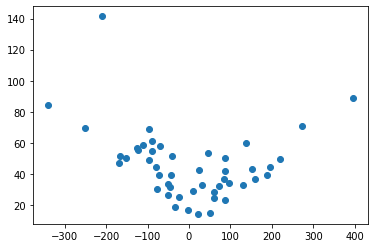

In [6]:
fund = 10000
w1 = 0.5
w2 = 0.5
val = []
stds = []
sharpe = []

for i, j in zip(acc, adaniports):
    fund, returns, std = day_eval(fund,i,j,w1,w2)
    val.append(returns)
    stds.append(std)
    sharpe.append(sharpe)
#print(val, stds)


plt.scatter(val, stds)
#plt.plot(stds)
plt.show()

## Elitism with Linear Weights

0
10000 0.5 0.5
9905.350000000004 0.0 1.0


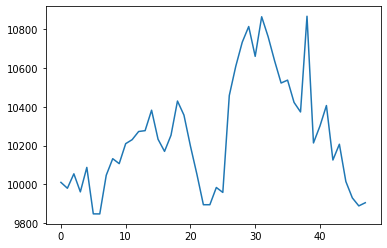

In [7]:
fund = 10000
w1 = 0.5
w2 = 0.5
val = []
weight = []
pop=50
k=0

for i, j in zip(acc, adaniports):
    if(k%500 is 0):
        print(k)
        print(fund, w1, w2)
    k+=1
    if(fund<0):
        break
    fund, returns, std = day_eval(fund,i,j,w1,w2)
    val.append(fund)
    _ = []
    ret = []
    stdev = []
    w1_array = np.linspace(0.0,1.0,pop)
    w1_array = np.where(w1_array<1, w1_array, 1)
    w1_array = np.where(w1_array>0, w1_array, 0)
    w2_array = 1-w1_array
    for a, b in zip(w1_array, w2_array):
        _.append(day_eval(fund, i, j, a, b)[0])
        ret.append(day_eval(fund, i, j, a, b)[1])
        stdev.append(day_eval(fund, i, j, a, b)[2])
    w1 = w1_array[np.argmax(np.array(ret))]
    w2 = w2_array[np.argmax(np.array(ret))]
    weight.append(w1)
print(fund, w1, w2)
plt.plot(val)
plt.show()

## Elitism with Gaussian Weights

0
10000 0.5 0.5
10325.599999999997 0.5956631638806386 0.40433683611936144


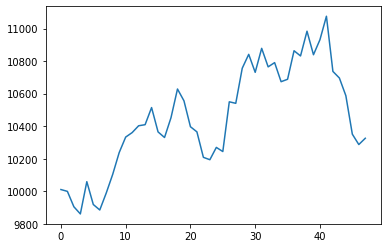

In [8]:
fund = 10000
w1 = 0.5
w2 = 0.5
val = []
weight = []
pop=50
k=0

for i, j in zip(acc, adaniports):
    if(k%500 is 0):
        print(k)
        print(fund, w1, w2)
    k+=1
    if(fund<0):
        break
    fund, returns, std = day_eval(fund,i,j,w1,w2)
    val.append(fund)
    _ = []
    ret = []
    stdev = []
    w1_array = np.random.normal(w1, size=pop, scale=0.05)
    w1_array = np.where(w1_array<1, w1_array, 1)
    w1_array = np.where(w1_array>0, w1_array, 0)
    w2_array = 1-w1_array
    for a, b in zip(w1_array, w2_array):
        _.append(day_eval(fund, i, j, a, b)[0])
        ret.append(day_eval(fund, i, j, a, b)[1])
        stdev.append(day_eval(fund, i, j, a, b)[2])
    w1 = w1_array[np.argmax(np.array(ret))]
    w2 = w2_array[np.argmax(np.array(ret))]
    weight.append(w1)
print(fund, w1, w2)
plt.plot(val)
plt.show()

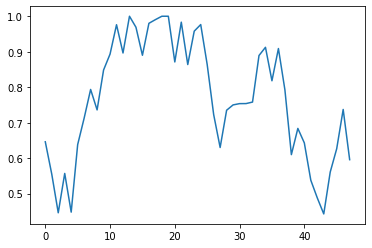

In [9]:
plt.plot(weight)
plt.show()

## Elitism with Composite Objective Functions - Linear

0
10000 0.5 0.5
10738.600000000004 0.2857142857142857 0.7142857142857143


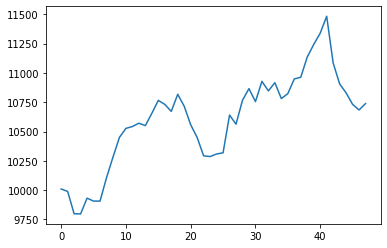

In [10]:
fund = 10000
w1 = 0.5
w2 = 0.5
val = []
weight = []
k=0
pop=50

a=.5

for i, j in zip(acc, adaniports):
    if(k%500 is 0):
        print(k)
        print(fund, w1, w2)
    k+=1
    if(fund<0):
        break
    fund, returns, std = day_eval(fund,i,j,w1,w2)
    val.append(fund)
    _ = []
    ret = []
    stdev = []
    w1_array = np.linspace(0,1,pop)
    w1_array = np.where(w1_array<1, w1_array, 1)
    w1_array = np.where(w1_array>0, w1_array, 0)
    w2_array = 1-w1_array
    for a, b in zip(w1_array, w2_array):
        _.append(day_eval(fund, i, j, a, b)[0])
        ret.append(day_eval(fund, i, j, a, b)[1])
        stdev.append(day_eval(fund, i, j, a, b)[2])
    ret=(ret-np.min(ret))/(np.max(ret)-np.min(ret))
    stdev=np.divide(1,stdev)
    stdev=np.divide((stdev-np.min(stdev)),(np.max(stdev)-np.min(stdev)))
    composite = (1-a)*ret + a*stdev
    w1 = w1_array[np.argmax(np.array(composite))]
    w2 = w2_array[np.argmax(np.array(composite))]
    weight.append(w1)
print(fund, w1, w2)
plt.plot(val)
plt.show()

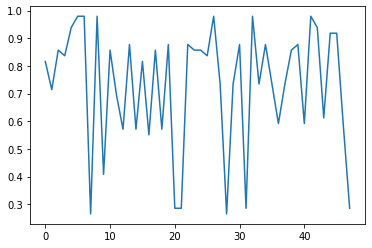

In [11]:
plt.plot(weight)
plt.show()

## Elitism with Composite Objective Functions - Gaussian

0
10000 0.5 0.5
10631.000000000002 0.7382890390789136 0.26171096092108637


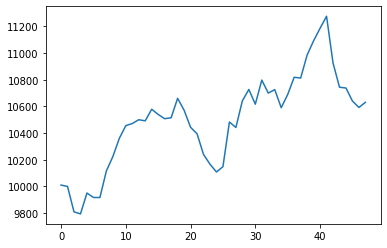

In [12]:
fund = 10000
w1 = 0.5
w2 = 0.5
val = []
weight = []
k=0
pop=50

a=1

for i, j in zip(acc, adaniports):
    if(k%500 is 0):
        print(k)
        print(fund, w1, w2)
    k+=1
    if(fund<0):
        break
    fund, returns, std = day_eval(fund,i,j,w1,w2)
    val.append(fund)
    _ = []
    ret = []
    stdev = []
    w1_array = np.random.normal(w1, size=pop, scale=0.05)
    w1_array = np.where(w1_array<1, w1_array, 1)
    w1_array = np.where(w1_array>0, w1_array, 0)
    w2_array = 1-w1_array
    for a, b in zip(w1_array, w2_array):
        _.append(day_eval(fund, i, j, a, b)[0])
        ret.append(day_eval(fund, i, j, a, b)[1])
        stdev.append(day_eval(fund, i, j, a, b)[2])
    ret=(ret-np.min(ret))/(np.max(ret)-np.min(ret))
    stdev=np.divide(1,stdev)
    stdev=np.divide((stdev-np.min(stdev)),(np.max(stdev)-np.min(stdev)))
    composite = (1-a)*ret + a*stdev
    w1 = w1_array[np.argmax(np.array(composite))]
    w2 = w2_array[np.argmax(np.array(composite))]
    weight.append(w1)
print(fund, w1, w2)
plt.plot(val)
plt.show()

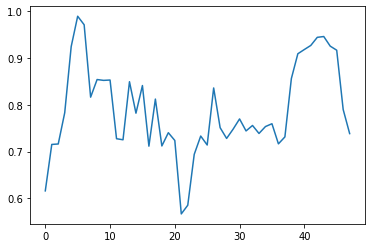

In [13]:
plt.plot(weight)
plt.show()

0
10000 0.5 0.5
10660.750000000011 0.7710900060253689 0.22890999397463108


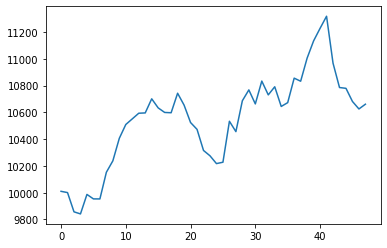

In [14]:
fund = 10000
w1 = 0.5
w2 = 0.5
val = []
weight = []
k=0
pop=50

a=.75

for i, j in zip(acc, adaniports):
    if(k%500 is 0):
        print(k)
        print(fund, w1, w2)
    k+=1
    if(fund<0):
        break
    fund, returns, std = day_eval(fund,i,j,w1,w2)
    val.append(fund)
    _ = []
    ret = []
    stdev = []
    w1_array = np.random.normal(w1, size=pop, scale=0.05)
    w1_array = np.where(w1_array<1, w1_array, 1)
    w1_array = np.where(w1_array>0, w1_array, 0)
    w2_array = 1-w1_array
    for a, b in zip(w1_array, w2_array):
        _.append(day_eval(fund, i, j, a, b)[0])
        ret.append(day_eval(fund, i, j, a, b)[1])
        stdev.append(day_eval(fund, i, j, a, b)[2])
    ret=(ret-np.min(ret))/(np.max(ret)-np.min(ret))
    stdev=np.divide(1,stdev)
    stdev=np.divide((stdev-np.min(stdev)),(np.max(stdev)-np.min(stdev)))
    composite = (1-a)*ret + a*stdev
    w1 = w1_array[np.argmax(np.array(composite))]
    w2 = w2_array[np.argmax(np.array(composite))]
    weight.append(w1)
print(fund, w1, w2)
plt.plot(val)
plt.show()

## 3D Mesh

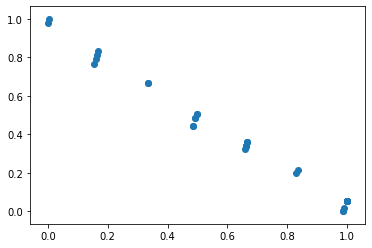

104917.84999999998 1.0 0.0


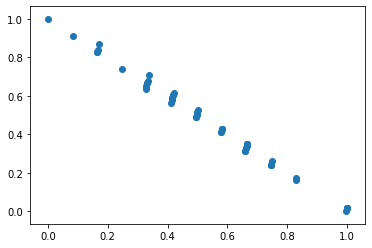

104664.50000000001 0.9116259430596578 0.08837405694034217


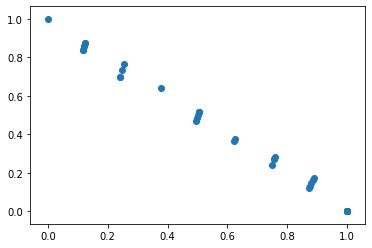

105131.3 0.983020481073362 0.01697951892663796


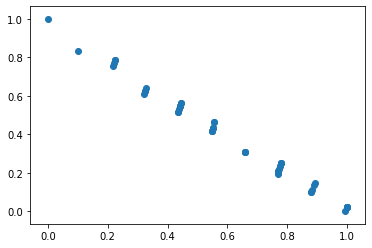

104723.95000000001 0.9349954035403739 0.06500459645962609


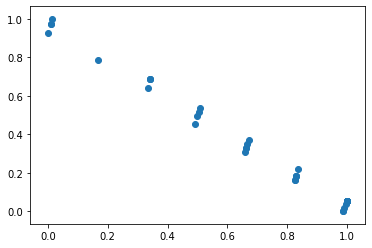

104996.29999999997 0.9919063073519331 0.008093692648066919


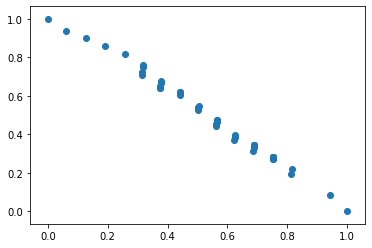

104785.64999999998 0.8832892853285849 0.11671071467141514


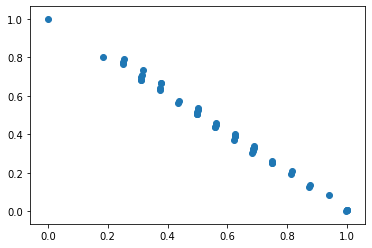

104529.95000000001 0.8954879692866131 0.10451203071338688


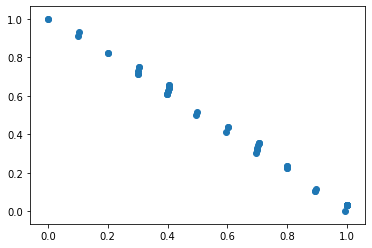

104658.00000000001 0.9337919206141153 0.06620807938588469


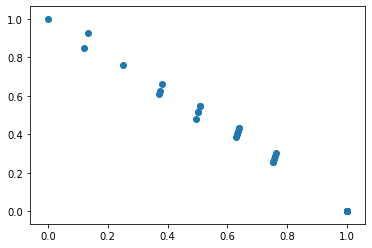

105092.59999999999 0.9938513563963263 0.006148643603673731


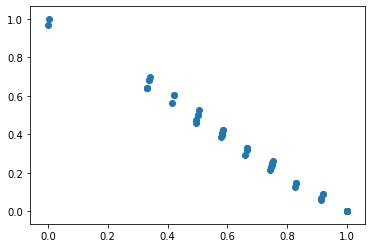

104965.34999999999 0.9543803085140574 0.04561969148594258


"\nfig = plt.figure()\nax = fig.gca(projection='3d')\nsurface=np.array(surface)\nx = np.arange(surface.shape[0])\ny = np.arange(surface.shape[1])\nX, Y = np.meshgrid(x, y)\nZ = surface.reshape(X.shape)\nprint(surface.shape)\nax.plot_surface(X, Y, Z)\n"

In [15]:
fund = 100000
w1 = 0.5
w2 = 0.5
val = []
weight = []
k=0
pop=50
from mpl_toolkits import mplot3d
surface=[]
y=np.arange(0,1,0.1)
for a in y:
    fund = 100000
    w1_array = list(np.arange(0,1.01,0.01))
    w2_array = list(np.arange(0,1.01,0.01))
    w2_array.reverse()
    k=0
    val = []
    for i, j in zip(acc, adaniports):
#        if(k%400 is 0):
#            print(k)
#            print(fund, w1, w2)
        k+=1
        if(fund<0):
            break
        fund, returns, std = day_eval(fund,i,j,w1,w2)
        val.append(fund)
        _ = []
        ret = []
        stdev = []
        w1_array = np.random.normal(w1, size=pop, scale=0.05)
        w1_array = np.where(w1_array<1, w1_array, 1)
        w1_array = np.where(w1_array>0, w1_array, 0)
        w2_array = 1-w1_array
        for a, b in zip(w1_array, w2_array):
            _.append(day_eval(fund, i, j, a, b)[0])
            ret.append(day_eval(fund, i, j, a, b)[1])
            stdev.append(day_eval(fund, i, j, a, b)[2])
        ret=(ret-np.min(ret))/(np.max(ret)-np.min(ret))
        stdev=np.divide(1,stdev)
        stdev=np.divide((stdev-np.min(stdev)),(np.max(stdev)-np.min(stdev)))
        composite = (1-a)*ret + a*stdev
        if k%10 is 0 and k is not 0:
            plt.scatter(ret, stdev)
            plt.show()
            break
        w1 = w1_array[np.argmax(np.array(composite))]
        w2 = w2_array[np.argmax(np.array(composite))]
        weight.append(w1)
    surface.append(val)
    print(fund, w1, w2)

    
    
'''
fig = plt.figure()
ax = fig.gca(projection='3d')
surface=np.array(surface)
x = np.arange(surface.shape[0])
y = np.arange(surface.shape[1])
X, Y = np.meshgrid(x, y)
Z = surface.reshape(X.shape)
print(surface.shape)
ax.plot_surface(X, Y, Z)
'''

In [16]:
def day_iterative_eval(fund,arr1,arr2,w1,w2):
    vals = []
    for i, j in zip(arr1, arr2):
        acc_fund = fund*w1
        adani_fund = fund*w2

        q1 = acc_fund//arr1[0]
        q2 = adani_fund//arr2[0]

        cash = fund - q1*arr1[0] - q2*arr2[0]
        vals.append(q1*i+q2*j+cash)
    
    return q1*arr1[-1]+q2*arr2[-1]+cash, (q1*arr1[-1]+q2*arr2[-1]+cash)-(fund), np.std(vals)

In [17]:
!pip3 install pymoo

You are using pip version 9.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize

In [19]:
from pymoo.factory import get_algorithm, get_crossover, get_mutation, get_sampling
from pymoo.optimize import minimize
from pymoo.model.problem import Problem

In [20]:
fund = 10000
x1 = acc[1]
x2 = adaniports[1]

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2, n_obj=1, n_constr=0, xl=np.array([0,0]), xu=np.array([1,1]), type_var=np.int)

    def _evaluate(self, x, out, *args, **kwargs):
        w1 = x[:,0]
        w2 = x[:,1]
        
        _, ret, stdev = day_eval(fund, x1, x2, w1, w2)
        
        out["F"] = np.column_stack([-_])
        #out["G"] = np.column_stack([w1+w2])


method = get_algorithm("ga",
                       pop_size=20,
                       sampling=get_sampling("real_random"),
                       crossover=get_crossover("real_sbx", prob=1.0, eta=3.0),
                       mutation=get_mutation("real_pm", eta=3.0),
                       elimate_duplicates=True,
                       )


res = minimize(MyProblem(),
               method,
               termination=('n_gen', 40),
               seed=1,
               save_history=True
               )

print("Best solution found: %s" % res.X)
print("Function value: %s" % -res.F)
print("Constraint violation: %s" % res.CV)



Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False

Best solution found: [0.01828828 0.75014431]
Function value: [10027.]
Constraint violation: [0.]


In [21]:
problem = MyProblem()

In [22]:
problem.evaluate(X=[0.5, 0.5])

array([-9998.35])

In [23]:
day_eval(10000, acc[1], adaniports[1],3.00175433e-05, 8.58211755e-01)

(10027.0, 27.0, 29.96181569931969)

In [24]:
fund = 10000

x1=acc[0]
x2=adaniports[0]
w1 = 0.5
w2 = 0.5

for i, j in zip(acc, adaniports):
    print(day_eval(fund, x1, x2, w1, w2)[0])
    x1 = i
    x2 = j
    res = minimize(MyProblem(),
               method,
               termination=('n_gen', 40),
               seed=1,
               save_history=True
               )
    fund = -res.F
    w1 = res.X[0]
    w2 = res.X[1]

    #print("Best solution found: %s" % res.X)
    #print("Function value: %s" % -res.F)
    #print("Constraint violation: %s" % res.CV)
    

10010.2
[10166.6]
[10139.1]
[10260.]
[10211.5]
[10897.85]
[10542.65]
[10542.65]
[11007.45]
[11260.15]
[11411.]
[11463.8]
[11437.05]
[11486.15]
[11467.2]
[11697.85]
[12572.5]
[12059.5]
[12344.4]
[12612.85]
[12407.4]
[12448.1]
[12427.75]
[12427.75]
[12461.35]
[12681.35]
[13098.45]
[14169.15]
[13872.85]
[14386.65]
[14349.85]
[14190.45]
[14735.55]
[14463.]
[14649.4]
[14556.2]
[15807.4]
[15866.6]
[15799.4]
[17184.8]
[17103.2]
[17081.45]
[17690.6]
[17300.45]
[17638.45]
[17470.45]
[17469.95]
[17469.95]


In [25]:
adaniports[0].shape

(25,)